## Build a Traffic Sign Recognition Classifier

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

training_file = 'train.p'
validation_file= 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**


### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
import numpy as np
# Number of training examples
n_train = len(X_train)

# Number of validation examples
n_validation = len(X_valid)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 


In [3]:
### Data exploration visualization code goes here.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

In [4]:
# Get the counts and indices of unique data
u, indices, counts = np.unique(y_train, return_index=True, return_counts = True)

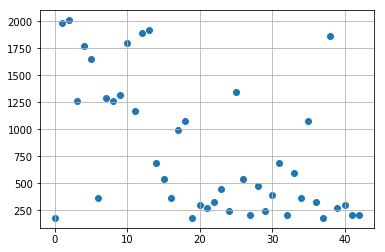

In [5]:
# Plot the count of each sign
labels =list(range(n_classes))
labels = np.array(labels)
plt.scatter(labels, counts)
plt.grid()

In [6]:
# Print the count of each sign
for i in range(n_classes):
    print("Label:  %2d, Count: %6d " %(i,counts[i]))

Label:   0, Count:    180 
Label:   1, Count:   1980 
Label:   2, Count:   2010 
Label:   3, Count:   1260 
Label:   4, Count:   1770 
Label:   5, Count:   1650 
Label:   6, Count:    360 
Label:   7, Count:   1290 
Label:   8, Count:   1260 
Label:   9, Count:   1320 
Label:  10, Count:   1800 
Label:  11, Count:   1170 
Label:  12, Count:   1890 
Label:  13, Count:   1920 
Label:  14, Count:    690 
Label:  15, Count:    540 
Label:  16, Count:    360 
Label:  17, Count:    990 
Label:  18, Count:   1080 
Label:  19, Count:    180 
Label:  20, Count:    300 
Label:  21, Count:    270 
Label:  22, Count:    330 
Label:  23, Count:    450 
Label:  24, Count:    240 
Label:  25, Count:   1350 
Label:  26, Count:    540 
Label:  27, Count:    210 
Label:  28, Count:    480 
Label:  29, Count:    240 
Label:  30, Count:    390 
Label:  31, Count:    690 
Label:  32, Count:    210 
Label:  33, Count:    599 
Label:  34, Count:    360 
Label:  35, Count:   1080 
Label:  36, Count:    330 
L

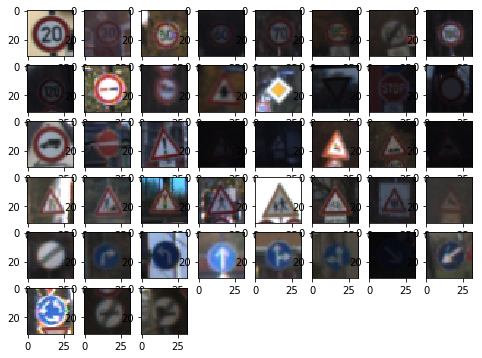

In [7]:
# plotting traffic sign images
fig=plt.figure(figsize=(8, 8))
columns = 8
rows = 8
count = 1
for i in indices:
    img = X_train[i].squeeze()
    fig.add_subplot(rows, columns, count)
    count = count + 1
    plt.imshow(img)
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).


There are various aspects to consider when thinking about this problem:
- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.


### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 


In [8]:
# convert the training images to grayscale
import cv2
prep_X_train = []
def gray_norm(rgb):
    gray = cv2.cvtColor(rgb,cv2.COLOR_RGB2GRAY)
    norm_image = cv2.normalize(gray, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    return norm_image
for img in X_train:
    prep_X_train.append(gray_norm(img))
prep_X_train = np.asarray(prep_X_train)
prep_X_train = np.resize(prep_X_train,(n_train,32,32,1))

In [9]:
# convert the validatiting images to grayscale
prep_X_valid = []
for img in X_valid:
    prep_X_valid.append(gray_norm(img))
prep_X_valid = np.asarray(prep_X_valid)
prep_X_valid = np.resize(prep_X_valid,(n_validation,32,32,1))

In [10]:
# convert the testing images to grayscale
prep_X_test = []
for img in X_test:
    prep_X_test.append(gray_norm(img))
prep_X_test = np.asarray(prep_X_test)
prep_X_test = np.resize(prep_X_test,(n_test,32,32,1))

### Model Architecture

In [11]:
import tensorflow as tf

EPOCHS = 10
BATCH_SIZE = 32

In [12]:
from tensorflow.contrib.layers import flatten
def TFRecC(x):
    mu = 0
    sigma = 0.1
    # Layer 1, input: 32x32x1, output: 28x28x6 
    conv1_W = tf.Variable(tf.truncated_normal(shape = (5,5,1,6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x,conv1_W, strides=  [1,1,1,1], padding = 'VALID') + conv1_b
    
    # Actication
    conv1 = tf.nn.relu(conv1)
    
    # Pooling, input: 28x28x6, output: 14x14x6
    conv1 = tf.nn.max_pool(conv1, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')
    
    #Layer 2, input: 14x14x6, output: 10x10x16
    conv2_W = tf.Variable(tf.truncated_normal(shape = (5,5,6,16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides = [1,1,1,1], padding= 'VALID') + conv2_b
    
    # Activation
    conv2 = tf.nn.relu(conv2)
    
    # Pooling, input: 10x10x16, output: 5x5x16
    conv2 = tf.nn.max_pool(conv2, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')
    
    # Flatten, input: 5x5x16, output: 400
    fc0 = flatten(conv2)
    
    # Layer 3, input: 400, output: 200
    fc1_W = tf.Variable(tf.truncated_normal(shape = (400,200), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(200))
    fc1 = tf.matmul(fc0,fc1_W) + fc1_b
    
    # Activation
    fc1 = tf.nn.relu(fc1)
    
    # Layer 4, input: 200, output: 120
    fc2_W = tf.Variable(tf.truncated_normal(shape = (200,120), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(120))
    fc2 = tf.matmul(fc1,fc2_W) + fc2_b
    
    # Activation
    fc2 = tf.nn.relu(fc2)
    
    # Layer 5, input:120, output: 84
    fc3_W = tf.Variable(tf.truncated_normal(shape = (120,84), mean = mu, stddev = sigma))
    fc3_b = tf.Variable(tf.zeros(84))
    fc3 = tf.matmul(fc2,fc3_W) + fc3_b
    
    # Activation
    fc3 = tf.nn.relu(fc3)
    
    # Layer 6, input:84, output: 43
    fc4_W = tf.Variable(tf.truncated_normal(shape = (84,43), mean = mu, stddev = sigma))
    fc4_b = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc3,fc4_W) + fc4_b
    return logits
    

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [13]:
# Features and labels
x = tf.placeholder(tf.float32,(None,32,32,1))
y = tf.placeholder(tf.int32,(None))
one_hot_y = tf.one_hot(y,43)

learning_rate = 0.001
logits = TFRecC(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_operation = optimizer.minimize(loss_operation)

### Model Evaluation

In [14]:
correct_prediction = tf.equal(tf.argmax(logits,1), tf.argmax(one_hot_y,1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0,num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x:batch_x, y: batch_y})
        total_accuracy += (accuracy* len(batch_x))
    return total_accuracy/num_examples

# Train the Model 

In [15]:
from sklearn.utils import shuffle
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = n_train

    print("Training...")
    print()
    for i in range(EPOCHS):
        prep_X_train, y_train = shuffle(prep_X_train,y_train)
        for offset in range(0,num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = prep_X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x:batch_x, y:batch_y})
        
        validation_accuracy = evaluate(prep_X_valid, y_valid)
        print("EPOCH {}".format(i+1))
        print("Validation_accuracy = {:.3f}".format(validation_accuracy))
        print()
    saver.save(sess,'./TSRecC')
    print("Model saved")

Training...

EPOCH 1
Validation_accuracy = 0.878

EPOCH 2
Validation_accuracy = 0.909

EPOCH 3
Validation_accuracy = 0.918

EPOCH 4
Validation_accuracy = 0.926

EPOCH 5
Validation_accuracy = 0.881

EPOCH 6
Validation_accuracy = 0.921

EPOCH 7
Validation_accuracy = 0.916

EPOCH 8
Validation_accuracy = 0.921

EPOCH 9
Validation_accuracy = 0.940

EPOCH 10
Validation_accuracy = 0.928

Model saved


# Evaluate the Model

In [16]:
with tf.Session() as sess:
    saver.restore(sess,tf.train.latest_checkpoint('.'))
    
    test_accuracy = evaluate(prep_X_test, y_test)
    print("Test Accuracy = {:.2f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./TSRecC
Test Accuracy = 0.91


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.


### Load and Output the Images

In [17]:
from PIL import Image
import matplotlib.pyplot as plt
import glob
import numpy as np
# Load the 5 test images
test_list = []
for filename in glob.glob('New_Images/*.png'): #assuming gif
    img=Image.open(filename)
    test_list.append(np.asarray(img))

test_label = np.array([34, 40, 13, 28, 0 ])

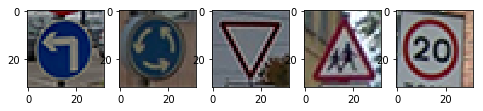

In [18]:
# plot the 5 images
fig=plt.figure(figsize=(8, 8))
columns = 5
rows = 1
for i in range(1, columns*rows +1):
    img = test_list[i-1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

# Predict the Sign Type for Each Image

In [19]:
 gray = cv2.cvtColor(test_list[0],cv2.COLOR_RGB2GRAY)

In [20]:
# Preprocess
prep_test_list = []
for img in test_list:
    prep_test_list.append(gray_norm(img))
prep_test_list = np.resize(prep_test_list,(5,32,32,1))

### Analyze Performance

In [21]:
### Calculate the accuracy for these 5 new images. 
with tf.Session() as sess:
    saver.restore(sess,tf.train.latest_checkpoint('.'))
    
    test_new_accuracy = evaluate(prep_test_list, test_label)
    print("Test Accuracy = {:.2f}".format(test_new_accuracy))

INFO:tensorflow:Restoring parameters from ./TSRecC
Test Accuracy = 0.80


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [23]:
x = tf.placeholder(tf.float32,(None,32,32,1))
y = tf.placeholder(tf.int32,(None))
one_hot_y = tf.one_hot(y,43)

logits = TFRecC(x)
softmax = tf.nn.softmax(logits=logits)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    result = sess.run(softmax, feed_dict={x:prep_test_list})
    print(sess.run(tf.nn.top_k(tf.constant(result), k=5)))


TopKV2(values=array([[ 0.02482952,  0.02428704,  0.02423169,  0.02407504,  0.02406711],
       [ 0.02474033,  0.02445406,  0.024253  ,  0.02422133,  0.02412842],
       [ 0.02559183,  0.02471736,  0.02471694,  0.02453169,  0.02443007],
       [ 0.02510241,  0.02442794,  0.02434398,  0.02429338,  0.02407245],
       [ 0.02617035,  0.02524219,  0.02486406,  0.02472422,  0.02457711]], dtype=float32), indices=array([[29, 13, 32, 11, 12],
       [29, 11, 12, 32,  3],
       [29, 10,  4, 19, 13],
       [29,  7, 11, 32,  4],
       [29, 32, 13, 12,  3]], dtype=int32))


## Visualization

In [24]:
# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# Note: that to get access to tf_activation, the session should be interactive which can be achieved with the following commands.
# sess = tf.InteractiveSession()
# sess.as_default()

# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and    max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")